In [29]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import cv2
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [27]:

# Chemins vers les dossiers contenant les images
varroas_folder = "base/varroas_crop_20"
non_varroas_folder = "base/non_varroas_crop_20/"

# Récupération des chemins des images dans chaque dossier
varroas_images = [os.path.join(varroas_folder, image_file) for image_file in os.listdir(varroas_folder)]
non_varroas_images = [os.path.join(non_varroas_folder, image_file) for image_file in os.listdir(non_varroas_folder)]

# Labels correspondants pour chaque classe
varroas_labels = [0] * len(varroas_images)  # Classe 0 pour les varroas
non_varroas_labels = [1] * len(non_varroas_images)  # Classe 1 pour les non-varroas

# Concaténation des données et des labels
images = varroas_images + non_varroas_images
labels = varroas_labels + non_varroas_labels

# Convertir les images en tableaux et les redimensionner si nécessaire
resized_images = []
for image_path in images:
    image = cv2.imread(image_path)
    resized_image = cv2.resize(image, (11, 11))  # dimensions souhaitées
    resized_images.append(resized_image)

# Convertir la liste en tableau numpy
X = np.array(resized_images)
y = np.array(labels)
print(y)
# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)



[0 0 0 ... 1 1 1]


In [21]:

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3) ,input_shape = (11,11,3),activation = 'relu'),  
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(32,(3,3) ,activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32,activation = 'relu'),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50, batch_size=50)


Epoch 1/50
196/196 [==============================] - 2s 6ms/step - loss: 0.2282 - accuracy: 0.9411
Epoch 2/50
196/196 [==============================] - 1s 4ms/step - loss: 0.0376 - accuracy: 0.9866
Epoch 3/50
196/196 [==============================] - 1s 4ms/step - loss: 0.0417 - accuracy: 0.9853
Epoch 4/50
196/196 [==============================] - 1s 4ms/step - loss: 0.0359 - accuracy: 0.9890
Epoch 5/50
196/196 [==============================] - 1s 4ms/step - loss: 0.0221 - accuracy: 0.9926
Epoch 6/50
196/196 [==============================] - 1s 4ms/step - loss: 0.0192 - accuracy: 0.9930
Epoch 7/50
196/196 [==============================] - 1s 6ms/step - loss: 0.0167 - accuracy: 0.9948
Epoch 8/50
196/196 [==============================] - 1s 6ms/step - loss: 0.0361 - accuracy: 0.9878
Epoch 9/50
196/196 [==============================] - 1s 6ms/step - loss: 0.0140 - accuracy: 0.9953
Epoch 10/50
196/196 [==============================] - 1s 6ms/step - loss: 0.0179 - accuracy: 0.9937

In [22]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

131/131 [==============================] - 0s 2ms/step - loss: 0.0189 - accuracy: 0.9952
Test accuracy: 0.995219886302948


131/131 [==============================] - 0s 1ms/step


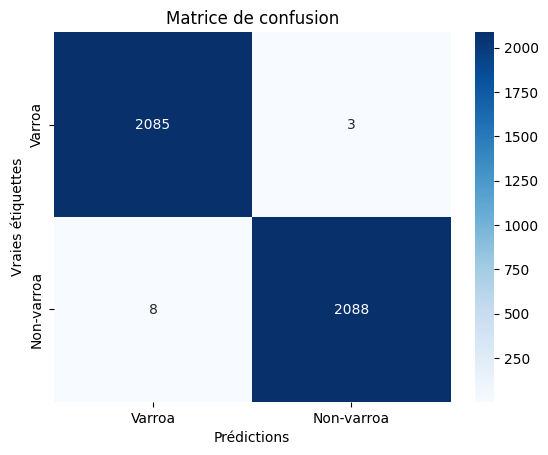

In [30]:
# Supposez que vous avez entraîné votre modèle et obtenu les prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

y_pred_binary = (y_pred >= 0.5).astype(int)

# Créer la matrice de confusion
confusion_matrix = confusion_matrix(y_test, y_pred_binary)

# Définir les étiquettes de classe
class_labels = ['Varroa', 'Non-varroa']  # Remplacez les noms des classes par les vôtres

# Créer une heatmap de la matrice de confusion
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)

# Ajouter des étiquettes d'axe et un titre
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.title('Matrice de confusion')

# Afficher la figure
plt.show()


